In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

# Ôn Tập

In [2]:
# Thao tác xử lý DataFrame

# 1 Bảng

  # Đọc bảng: pd.read_csv()
  # Kiểm tra bảng:
    # Xem bảng trông như thế nào: df.head(), df.tail(), df.sample(n)
    # Xem tổng quát về bảng:
      # Cấu trúc
        # Bao nhiêu hàng, bao nhiêu cột -> df.shape
        # Tên cột: df.columns
        # Kiểu dữ liệu từng cột: df.info()
      # Nội dung -> Giá trị thống kê
  # Xử lý bảng
    # Truy cập dữ liệu
      # .loc()
      # .iloc()
    # Chỉnh sửa dữ liệu
      # Chỉnh sửa cấu trúc
        # Đổi tên côt: .rename()
        # Thêm cột mới: df['cột mới'] = giá trị cột mới
        # Thêm dòng mới: .append()
        # Xoá cột: .drop(cột muốn xoá, axis = 1, inplace=True)
        # Xoá dòng: .drop(dòng muốn xoá, axis = 0, inplace=True)
      # Chỉnh sủa nội dung: .replace(giá trị muốn thay, giá trị mới, inplace=True)
    # Tổng hợp dữ liệu: pivot_table()
  # Xuất bảng: df.to_csv('filename.csv')

# 2 Bảng trở lên -> Hợp nhất dữ liệu từ nhiều nguồn
  # Hợp nhất cột
  # Hợp nhất dòng

# Thống kê mô tả

In [17]:
# Đọc dữ liệu
df = pd.read_csv('FoodPrice_in_Turkey.csv')
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [18]:
df_price = df.loc[:,'Price']

In [19]:
# Mô tả dữ liệu
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


##### Nhận xét:

mean = 15.7 --> giá trung bình sản phầm về thực phẩm ở Turkey là 15.7 đồng

std = 22.4 ---> Mức chênh lệch giá của các sản phẩm so với giá trung bình là 22.4 đồng
-> đây là mức chênh lệch lớn -> dữ liệu có dấu hiệu lệch -> có khả năng có outliers / giá trị mean = 15.7 chưa chắc là tốt, hơi gây hiểu nhầm cho tập dữ liệu

min = 0.25 đồng, giá trị nhỏ nhất -> giá trị nhỏ, lệch rất xa với giá trị mean

25%: 3.22 --> 25% sản phẩm có giá dưới 3.22 đồng (lệch xa so với mean)

50%: 5.99 --> = median, có 50% sản phẩm có giá dưới 5.9 đồng --> vẫn xa so với giá trị trung bình (mean = 15.7)
-> nhiều dữ liệu giá thấp ( dữ liệu bị lệch, có thể do nhiều sản phẩm có giá cao dẫn đến mean cao) 

75%: 20.4 --> có 75% sản phẩm có giá dưới 20.4 đồng

max: 159.4 --> rất cao so với giá trung bình

Kết luận: tập dữ liệu bị lệch, thiên về khoảng giá thấp. Có vẻ đa phần dữ liệu là giá thấp, nhưng có 1 vài sản phẩm giá cao hơn hẳn

--> nếu gặp trường hợp này: điều tra outliers không--> tìm nguyên nhân -> tìm xách xử lý
do vậy: tách dữ liệu thành 2 phần để phân tích:
P1: dữ liệu không có giá trị ngoại lai
P2: dữ liệu có giá trị ngoại lai


In [6]:
# Đếm
df_price.count()

7381

In [7]:
# Giá trị nhỏ nhất
df_price.min()

0.2539

In [8]:
# Giá trị lớn nhất
df_price.max()

159.4458

In [9]:
# Giá trị trung bình
df_price.mean()

15.738708576073702

In [10]:
# Giá trị trung vị
df_price.median()

5.9096

In [11]:
# Giá trị xuất hiện nhiều nhất
df_price.mode()

0    0.4118
Name: Price, dtype: float64

In [12]:
# Xem quartile
df_price.describe()

count    7381.000000
mean       15.738709
std        22.418284
min         0.253900
25%         3.223600
50%         5.909600
75%        20.441900
max       159.445800
Name: Price, dtype: float64

In [13]:
# Phương sai (Variance)
df_price.var()

502.5794374448817

In [14]:
# Độ lệch chuẩn
df_price.std()

22.418283552602364

<Axes: xlabel='Price', ylabel='Count'>

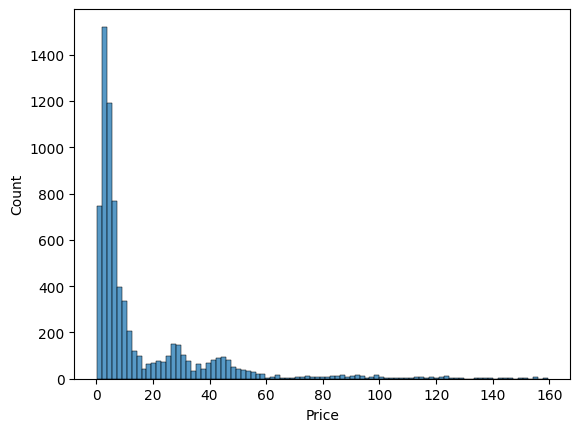

In [20]:
sns.histplot(df_price)

# Pivot Table

In [21]:
# Tính trung bình cộng giá của từng mặt hàng theo năm
df.pivot_table(values='Price',index='ProductName',columns='Year',aggfunc ='mean')

Year,2013,2014,2015,2016,2017,2018,2019
ProductName,,,,,,,
Apples (red) - Retail,2.080950,2.410118,2.401417,2.428333,2.560000,NaN,NaN
Apples - Retail,NaN,NaN,NaN,NaN,3.334175,3.923417,4.259810
Bananas - Retail,4.002225,4.962827,5.368833,5.914167,7.313738,8.701475,10.879371
Beans (white) - Retail,6.932800,9.484309,7.288333,6.949167,9.217700,9.242844,11.658690
Bread (common) - Retail,2.853000,3.069491,2.982917,3.373333,4.178841,4.740619,5.513271
Bread (pita) - Retail,NaN,NaN,2.311429,2.440000,2.480000,NaN,NaN
Bulgur - Retail,2.405025,2.593791,2.680500,2.765833,3.293874,3.546027,4.369369
Cabbage - Retail,1.104800,1.073233,1.197000,1.375714,1.589495,1.751664,2.232738
Cauliflower - Retail,2.046950,2.129317,2.772800,2.655714,2.878481,3.237750,4.326537


In [22]:
# Tìm giá lớn nhất theo từng năm
df.pivot_table(values='Price', columns='Year',aggfunc ='max')

Year,2013,2014,2015,2016,2017,2018,2019
Price,40.1146,39.7204,65.54,76.96,93.9628,159.4458,150.038


In [23]:
# Tìm giá lớn nhất của từng mặt hàng
df.pivot_table(values='Price', index='ProductName',aggfunc ='max')

,Price
ProductName,
Apples (red) - Retail,2.9800
Apples - Retail,6.0925
Bananas - Retail,12.9400
Beans (white) - Retail,13.0975
Bread (common) - Retail,6.1942
Bread (pita) - Retail,2.5600
Bulgur - Retail,5.2611
Cabbage - Retail,3.2543
Cauliflower - Retail,5.9113


In [27]:
# Tính giá lớn nhất, giá nhỏ nhất của từng địa điểm theo tháng
df.pivot_table(values='Price', index='Month', columns='Place', aggfunc = {'min', 'max'})

max                                          min                   \
Place    Ankara  Istanbul     Izmir National Average  Ankara Istanbul   Izmir   
Month                                                                           
1      115.3673  133.6567  138.4894         120.3109  0.4118   0.4118  0.4118   
2      114.5794  128.7900  136.9639         118.3407  0.4118   0.4118  0.4118   
3      114.4755  125.3457  135.8439         117.1583  0.4118   0.4118  0.4118   
4      115.3275  122.9646  136.6353         118.2785  0.4054   0.4118  0.4118   
5      115.1821  121.9435  135.7095         118.3900  0.3998   0.4118  0.4118   
6      121.1607  125.6170  145.7873         123.7930  0.3845   0.4072  0.4073   
7      122.2225  126.5250  150.0380         125.7592  0.3805   0.4075  0.3885   
8      122.4023  122.9007  143.0405         122.8990  0.4118   0.4118  0.4118   
9      127.7275  137.1003  150.6258         143.7910  0.4118   0.4118  0.4118   
10     147.0118  155.8673  159.4458         154.9253  0.4120   0.4120  0.4120   
11     151.3404  155.3362  155.8369         155.2338  0.4120   0.4120  0.4120   
12     151.5234  154.4567  155.9032         154.8652  0.4120   0.4120  0.4120   

                        
Place National Average  
Month                   
1               0.3210  
2               0.3400  
3               0.3400  
4               0.3200  
5               0.2539  
6               0.2677  
7               0.3200  
8               0.3200  
9               0.3500  
10              0.3260  
11              0.3150  
12              0.3190

#### Tính tổng giá và trung bình số tháng bán hàng của từng mặt hàng theo địa điểm

phân tích:

1. tính tổng giá: -> giá: Price - values, tính tổng: agg = sum
   của từng mặt hàng: cột ProductName -> index
   theo từng điạ điểm: cột Place -> columns 

 2. tính trung bình số tháng: -> tháng: Month - values, tính trung bình: agg = mean
   của từng mặt hàng: cột ProductName -> index
   theo từng điạ điểm: cột Place -> columns 

--> values: ['Price', 'Month']
index: 'ProductName'
columns: 'Place'
aggfunc: {'Price': 'sum', 'Month': 'mean'}

In [26]:
# Tính tổng giá và trung bình số tháng bán hàng của từng mặt hàng theo địa điểm
df.pivot_table(values=['Price','Month'], index='ProductName', columns='Place', aggfunc ={'Price': 'sum','Month': 'mean'})

Month            \
Place                                                 Ankara  Istanbul   
ProductName                                                              
Apples (red) - Retail                                    NaN       NaN   
Apples - Retail                                     6.500000  6.500000   
Bananas - Retail                                    6.500000  6.500000   
Beans (white) - Retail                              6.500000  6.500000   
Bread (common) - Retail                             6.500000  6.500000   
Bread (pita) - Retail                                    NaN       NaN   
Bulgur - Retail                                     6.500000  6.500000   
Cabbage - Retail                                    6.421053  6.421053   
Cauliflower - Retail                                6.294118  6.294118   
Cheese - Retail                                     6.500000  6.500000   
Chickpeas - Retail                                  6.500000  6.500000   
Cocoa (powder) - Retail                             6.500000  6.500000   
Coffee (instant) - Retail                           7.071429  7.071429   
Coffee - Retail                                     6.500000  6.500000   
Cucumbers (greenhouse) - Retail                          NaN       NaN   
Cucumbers - Retail                                  6.500000  6.500000   
Eggplants - Retail                                  6.500000  6.500000   
Eggs - Retail                                       6.500000  6.500000   
Electricity - Retail                                6.500000  6.500000   
Fish (fresh) - Retail                               6.500000  6.500000   
Fuel (gas) - Retail                                 6.500000  6.500000   
Fuel (petrol-gasoline) - Retail                     6.500000  6.500000   
Garlic - Retail                                     6.500000  6.500000   
Groundnuts (shelled) - Retail                       6.500000  6.500000   
Lentils - Retail                                    6.500000  6.500000   
Meat (chicken) - Retail                             6.500000  6.500000   
Meat (mutton) - Retail                              6.500000  6.500000   
Meat (veal) - Retail                                6.500000  6.500000   
Milk (pasteurized) - Retail                         6.500000  6.500000   
Milk (powder, infant formula) - Retail              6.500000  6.500000   
Oil (olive) - Retail                                6.500000  6.500000   
Oil (sunflower) - Retail                            6.500000  6.500000   
Onions - Retail                                     6.500000  6.500000   
Oranges - Retail                                    5.846154  5.846154   
Pasta - Retail                                      6.500000  6.500000   
Peas (green, dry) - Retail                               NaN       NaN   
Potatoes - Retail                                   6.500000  6.500000   
Rice - Retail                                       6.500000  6.500000   
Salt - Retail                                       6.500000  6.500000   
Spinach - Retail                                    6.294118  6.294118   
Sugar - Retail                                      6.500000  6.500000   
Tea (green) - Retail                                     NaN       NaN   
Tea (herbal) - Retail                               6.500000  6.500000   
Tea - Retail                                        6.500000  6.500000   
Tomatoes (paste) - Retail                           6.500000  6.500000   
Tomatoes - Retail                                   6.500000  6.500000   
Transport (public) - Retail                         6.428571  6.500000   
Wage (non-qualified labour, non-agricultural) -...       NaN       NaN   
Water - Retail                                      6.500000  6.500000   
Wheat flour - Retail                                6.500000  6.500000   
Yogurt - Retail                                     6.500000  6.500000   
Zucchini - Retail                                   6.50000

In [28]:
# Tính giá trung bình của từng mặt hàng theo năm
# values: giá
# index: mặt hàng
# columns: năm
# aggfunc: 'mean'

df.pivot_table(values='Price', index='ProductName', columns='Year', aggfunc = 'mean')

Year,2013,2014,2015,2016,2017,2018,2019
ProductName,,,,,,,
Apples (red) - Retail,2.080950,2.410118,2.401417,2.428333,2.560000,NaN,NaN
Apples - Retail,NaN,NaN,NaN,NaN,3.334175,3.923417,4.259810
Bananas - Retail,4.002225,4.962827,5.368833,5.914167,7.313738,8.701475,10.879371
Beans (white) - Retail,6.932800,9.484309,7.288333,6.949167,9.217700,9.242844,11.658690
Bread (common) - Retail,2.853000,3.069491,2.982917,3.373333,4.178841,4.740619,5.513271
Bread (pita) - Retail,NaN,NaN,2.311429,2.440000,2.480000,NaN,NaN
Bulgur - Retail,2.405025,2.593791,2.680500,2.765833,3.293874,3.546027,4.369369
Cabbage - Retail,1.104800,1.073233,1.197000,1.375714,1.589495,1.751664,2.232738
Cauliflower - Retail,2.046950,2.129317,2.772800,2.655714,2.878481,3.237750,4.326537


In [29]:
# Tính giá trung bình của từng mặt hàng vào năm gần nhất

# tính giá trung bình -> values: giá 'Price', aggfunc = 'mean'
# của từng mặt hàng--> index: mặt hàng 'ProductName'
# vào năm gần nhất --> columns: năm gần nhất --> max của năm: values = 'Year', aggfunc = 'max'

# values: ['Price', 'Year']
# index: 'ProductName'
# columns: không cần nữa
# aggfunc: {'Price':'mean','Year':'max'}

df.pivot_table(values=['Price','Year'], index='ProductName', aggfunc = {'Price':'mean','Year':'max'})

,Price,Year
ProductName,,
Apples (red) - Retail,2.392193,2017
Apples - Retail,3.885039,2019
Bananas - Retail,8.224784,2019
Beans (white) - Retail,9.572830,2019
Bread (common) - Retail,4.463293,2019
Bread (pita) - Retail,2.404545,2017
Bulgur - Retail,3.516712,2019
Cabbage - Retail,1.723395,2019
Cauliflower - Retail,3.274868,2019


# Hợp nhất dữ liệu từ nhiều nguồn

## Hợp nhất cột

### Chuẩn bị

In [30]:
# Xóa các dòng có thuộc tính ProductID trùng nhau, giữ lại bản ghi cuối cùng, giữ chỉ số ban đầu của các dòng
df=df.drop_duplicates(['ProductId'], keep='last')
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
1011,National Average,176,Tea (green) - Retail,33,Unit,3,2017,4.6500
1318,National Average,212,"Peas (green, dry) - Retail",5,KG,6,2015,3.2900
1360,National Average,229,Apples (red) - Retail,5,KG,3,2017,2.8300
1436,National Average,233,Cucumbers (greenhouse) - Retail,5,KG,3,2017,4.2400
2064,National Average,384,Bread (pita) - Retail,5,KG,3,2017,2.4800
2494,National Average,465,"Wage (non-qualified labour, non-agricultural) ...",51,Day,3,2017,46.8000
5833,Izmir,52,Rice - Retail,5,KG,12,2019,10.2803
5869,Izmir,58,Wheat flour - Retail,5,KG,12,2019,4.2703
5905,Izmir,66,Beans (white) - Retail,5,KG,12,2019,13.0975
5941,Izmir,83,Potatoes - Retail,5,KG,12,2019,2.0924


In [31]:
# Xóa các dòng có thuộc tính ProductID trùng nhau, giữ lại bản ghi cuối cùng, thiết lập lại chỉ số
df=df.drop_duplicates(['ProductId'],keep='last').reset_index(drop=True)
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,176,Tea (green) - Retail,33,Unit,3,2017,4.6500
1,National Average,212,"Peas (green, dry) - Retail",5,KG,6,2015,3.2900
2,National Average,229,Apples (red) - Retail,5,KG,3,2017,2.8300
3,National Average,233,Cucumbers (greenhouse) - Retail,5,KG,3,2017,4.2400
4,National Average,384,Bread (pita) - Retail,5,KG,3,2017,2.4800
5,National Average,465,"Wage (non-qualified labour, non-agricultural) ...",51,Day,3,2017,46.8000
6,Izmir,52,Rice - Retail,5,KG,12,2019,10.2803
7,Izmir,58,Wheat flour - Retail,5,KG,12,2019,4.2703
8,Izmir,66,Beans (white) - Retail,5,KG,12,2019,13.0975
9,Izmir,83,Potatoes - Retail,5,KG,12,2019,2.0924


In [32]:
# Tách file chứa thông tin sản phẩm
df_pro = df.loc[:,['ProductId','ProductName','UmId','UmName']]
df_pro

,ProductId,ProductName,UmId,UmName
0,176,Tea (green) - Retail,33,Unit
1,212,"Peas (green, dry) - Retail",5,KG
2,229,Apples (red) - Retail,5,KG
3,233,Cucumbers (greenhouse) - Retail,5,KG
4,384,Bread (pita) - Retail,5,KG
5,465,"Wage (non-qualified labour, non-agricultural) ...",51,Day
6,52,Rice - Retail,5,KG
7,58,Wheat flour - Retail,5,KG
8,66,Beans (white) - Retail,5,KG
9,83,Potatoes - Retail,5,KG


In [33]:
# Tách file chứa thông tin giá
df_pri = df.loc[:,['ProductId','Place','Month','Year','Price']]
df_pri

,ProductId,Place,Month,Year,Price
0,176,National Average,3,2017,4.6500
1,212,National Average,6,2015,3.2900
2,229,National Average,3,2017,2.8300
3,233,National Average,3,2017,4.2400
4,384,National Average,3,2017,2.4800
5,465,National Average,3,2017,46.8000
6,52,Izmir,12,2019,10.2803
7,58,Izmir,12,2019,4.2703
8,66,Izmir,12,2019,13.0975
9,83,Izmir,12,2019,2.0924


In [34]:
# Tách file chứa thông tin giá với số dòng từ bản ghi 10 đến 20
df_pri10 = df.loc[10:20,['ProductId','Place','Month','Year','Price']]
df_pri10

,ProductId,Place,Month,Year,Price
10,92,Izmir,12,2019,0.6301
11,94,Izmir,12,2019,11.7723
12,97,Izmir,12,2019,5.5038
13,105,Izmir,12,2019,38.4497
14,108,Izmir,12,2019,7.5267
15,112,Izmir,12,2019,4.9827
16,114,Izmir,12,2019,4.7359
17,119,Izmir,12,2019,33.0362
18,124,Izmir,12,2019,5.9795
19,151,Izmir,12,2019,51.5925


### Thao tác gộp cột

Cách 1: Dùng phương thức merge ghép 2 dataFrame có cùng chung một cột thuộc tính. DataFrame mới được tạo ra gồm các thuộc tính riêng và thuộc tính chung. Cú pháp cơ bản: pd.merge(dataFram1,dataFram2,on=’Tên thuộc tính chung’).

Cách 2: Dùng phương thức concat cho phép ghép từ hai dataFrame trở lên lại với nhau. Các dataFrame không cần cột thuộc tính chung, dataFrame mới được tạo ra bao gồm tất cả các cột thuộc tính của các dataFrame cần ghép. Tham số axis = 1 có nghĩa là dữ liệu được ghép theo cột. Cú pháp cơ bản: pd.concat([dataFram1,dataFram2,…], axis=1).

Chú ý: Trong trường hợp số dòng của các DataFrame không bằng nhau, giá trị NaN sẽ được điền vào các ô thiếu dữ liệu.

In [35]:
df1=pd.merge(df_pro,df_pri, on='ProductId')
df1

,ProductId,ProductName,UmId,UmName,Place,Month,Year,Price
0,176,Tea (green) - Retail,33,Unit,National Average,3,2017,4.6500
1,212,"Peas (green, dry) - Retail",5,KG,National Average,6,2015,3.2900
2,229,Apples (red) - Retail,5,KG,National Average,3,2017,2.8300
3,233,Cucumbers (greenhouse) - Retail,5,KG,National Average,3,2017,4.2400
4,384,Bread (pita) - Retail,5,KG,National Average,3,2017,2.4800
5,465,"Wage (non-qualified labour, non-agricultural) ...",51,Day,National Average,3,2017,46.8000
6,52,Rice - Retail,5,KG,Izmir,12,2019,10.2803
7,58,Wheat flour - Retail,5,KG,Izmir,12,2019,4.2703
8,66,Beans (white) - Retail,5,KG,Izmir,12,2019,13.0975
9,83,Potatoes - Retail,5,KG,Izmir,12,2019,2.0924


In [36]:
df2=pd.concat([df_pro,df_pri], axis=1)
df2

,ProductId,ProductName,UmId,UmName,ProductId,Place,Month,Year,Price
0,176,Tea (green) - Retail,33,Unit,176,National Average,3,2017,4.6500
1,212,"Peas (green, dry) - Retail",5,KG,212,National Average,6,2015,3.2900
2,229,Apples (red) - Retail,5,KG,229,National Average,3,2017,2.8300
3,233,Cucumbers (greenhouse) - Retail,5,KG,233,National Average,3,2017,4.2400
4,384,Bread (pita) - Retail,5,KG,384,National Average,3,2017,2.4800
5,465,"Wage (non-qualified labour, non-agricultural) ...",51,Day,465,National Average,3,2017,46.8000
6,52,Rice - Retail,5,KG,52,Izmir,12,2019,10.2803
7,58,Wheat flour - Retail,5,KG,58,Izmir,12,2019,4.2703
8,66,Beans (white) - Retail,5,KG,66,Izmir,12,2019,13.0975
9,83,Potatoes - Retail,5,KG,83,Izmir,12,2019,2.0924


In [37]:
df2=pd.concat([df_pro,df_pri,df_pri10], axis=1)
df2

,ProductId,ProductName,UmId,UmName,ProductId,Place,Month,Year,Price,ProductId,Place,Month,Year,Price
0,176,Tea (green) - Retail,33,Unit,176,National Average,3,2017,4.6500,NaN,NaN,NaN,NaN,NaN
1,212,"Peas (green, dry) - Retail",5,KG,212,National Average,6,2015,3.2900,NaN,NaN,NaN,NaN,NaN
2,229,Apples (red) - Retail,5,KG,229,National Average,3,2017,2.8300,NaN,NaN,NaN,NaN,NaN
3,233,Cucumbers (greenhouse) - Retail,5,KG,233,National Average,3,2017,4.2400,NaN,NaN,NaN,NaN,NaN
4,384,Bread (pita) - Retail,5,KG,384,National Average,3,2017,2.4800,NaN,NaN,NaN,NaN,NaN
5,465,"Wage (non-qualified labour, non-agricultural) ...",51,Day,465,National Average,3,2017,46.8000,NaN,NaN,NaN,NaN,NaN
6,52,Rice - Retail,5,KG,52,Izmir,12,2019,10.2803,NaN,NaN,NaN,NaN,NaN
7,58,Wheat flour - Retail,5,KG,58,Izmir,12,2019,4.2703,NaN,NaN,NaN,NaN,NaN
8,66,Beans (white) - Retail,5,KG,66,Izmir,12,2019,13.0975,NaN,NaN,NaN,NaN,NaN
9,83,Potatoes - Retail,5,KG,83,Izmir,12,2019,2.0924,NaN,NaN,NaN,NaN,NaN


## Hợp nhất dòng

### Chuẩn bị

In [38]:
df = pd.read_csv('FoodPrice_in_Turkey.csv')

In [39]:
# Tách file 1 chứa 5000 bản ghi đầu tiên
df1 = df.loc[0:4999,:]
df1

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
4995,Istanbul,244,Chickpeas - Retail,5,KG,9,2019,9.3149
4996,Istanbul,244,Chickpeas - Retail,5,KG,10,2019,9.3030
4997,Istanbul,244,Chickpeas - Retail,5,KG,11,2019,9.3457
4998,Istanbul,244,Chickpeas - Retail,5,KG,12,2019,9.1283


In [40]:
# Tách file 2 chứa các bản ghi còn lại
df2 = df.loc[5000:7380,:]
df2

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
5000,Istanbul,254,Bananas - Retail,5,KG,2,2017,6.6223
5001,Istanbul,254,Bananas - Retail,5,KG,3,2017,7.4073
5002,Istanbul,254,Bananas - Retail,5,KG,4,2017,8.6899
5003,Istanbul,254,Bananas - Retail,5,KG,5,2017,8.7397
5004,Istanbul,254,Bananas - Retail,5,KG,6,2017,8.2051
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [41]:
# Tách file 3 chứa thông tin giá với số dòng từ bản ghi 1000 đến 2000
df3 = df.loc[1000:2000,['ProductId','Place','Month','Year','Price']]
df3

,ProductId,Place,Month,Year,Price
1000,176,National Average,4,2016,4.4000
1001,176,National Average,5,2016,4.4600
1002,176,National Average,6,2016,4.5400
1003,176,National Average,7,2016,4.5700
1004,176,National Average,8,2016,4.5900
...,...,...,...,...,...
1996,360,National Average,12,2019,3.5717
1997,364,National Average,6,2015,4.0000
1998,364,National Average,7,2015,3.9700
1999,364,National Average,8,2015,4.0100


### Ghép các dòng từ các file

In [42]:
df4=pd.concat([df1,df2], axis=0)
df4

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [43]:
df5=pd.concat([df1,df2,df3], axis=0)
df5

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5.0,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5.0,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5.0,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5.0,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5.0,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
1996,National Average,360,NaN,NaN,NaN,12,2019,3.5717
1997,National Average,364,NaN,NaN,NaN,6,2015,4.0000
1998,National Average,364,NaN,NaN,NaN,7,2015,3.9700
1999,National Average,364,NaN,NaN,NaN,8,2015,4.0100


In [47]:
df6 = df1.append(df2)
df6

AttributeError: 'DataFrame' object has no attribute 'append'

In [46]:
df7=df1.append(df3)
df7

AttributeError: 'DataFrame' object has no attribute 'append'